### Biblitecas

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import tokenize
import nltk
import seaborn as sns
from nltk import word_tokenize
from string import punctuation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
import re
import time
from datasketch import MinHash, MinHashLSHForest
from string import punctuation

# Data Cleaning

### Leitura os dados da base Scopus

In [41]:
'''

#Geral

list_files1 = [] #arquivos com os 2000 primeiros na busca genérica
list_files2 = [] #arquivos com os artigos das buscas pelos brasileiros

for i in range(10, 21): 
    versao = 1
    dados_scopus = pd.read_csv("scopus20"+str(i)+"-"+str(versao)+".csv")
    df_colunas = dados_scopus[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
    list_files1.append(df_colunas);


for j in range(10, 21): 
    versao = 2
    dados_scopus = pd.read_csv("scopus20"+str(j)+"-"+str(versao)+".csv")
    df_colunas = dados_scopus[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
    list_files2.append(df_colunas);
    

print(len(list_files1),len(list_files2))

df_pesquisa1_scopus = pd.concat(list_files1)
df_pesquisa2_scopus = pd.concat(list_files2)

df_scopus = pd.concat([df_pesquisa1_scopus,df_pesquisa2_scopus])

df_scopus.shape

'''

'\n\n#Geral\n\nlist_files1 = [] #arquivos com os 2000 primeiros na busca genérica\nlist_files2 = [] #arquivos com os artigos das buscas pelos brasileiros\n\nfor i in range(10, 21): \n    versao = 1\n    dados_scopus = pd.read_csv("scopus20"+str(i)+"-"+str(versao)+".csv")\n    df_colunas = dados_scopus[[\'Authors\', \'Title\', \'Year\', \'DOI\', \'Link\', \'Authors with affiliations\', \'Abstract\', \'Author Keywords\', \'Publisher\']]\n    list_files1.append(df_colunas);\n\n\nfor j in range(10, 21): \n    versao = 2\n    dados_scopus = pd.read_csv("scopus20"+str(j)+"-"+str(versao)+".csv")\n    df_colunas = dados_scopus[[\'Authors\', \'Title\', \'Year\', \'DOI\', \'Link\', \'Authors with affiliations\', \'Abstract\', \'Author Keywords\', \'Publisher\']]\n    list_files2.append(df_colunas);\n    \n\nprint(len(list_files1),len(list_files2))\n\ndf_pesquisa1_scopus = pd.concat(list_files1)\ndf_pesquisa2_scopus = pd.concat(list_files2)\n\ndf_scopus = pd.concat([df_pesquisa1_scopus,df_pesquis

In [42]:
'''


#Pesquisa1

list_files1 = [] #arquivos com os 2000 primeiros na busca genérica

for i in range(10, 21): 
    versao = 1
    dados_scopus = pd.read_csv("scopus20"+str(i)+"-"+str(versao)+".csv")
    df_colunas = dados_scopus[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
    list_files1.append(df_colunas);

df_pesquisa1_scopus = pd.concat(list_files1)
df_scopus = pd.concat([df_pesquisa1_scopus])

df_scopus.shape'''

'\n\n\n#Pesquisa1\n\nlist_files1 = [] #arquivos com os 2000 primeiros na busca genérica\n\nfor i in range(10, 21): \n    versao = 1\n    dados_scopus = pd.read_csv("scopus20"+str(i)+"-"+str(versao)+".csv")\n    df_colunas = dados_scopus[[\'Authors\', \'Title\', \'Year\', \'DOI\', \'Link\', \'Authors with affiliations\', \'Abstract\', \'Author Keywords\', \'Publisher\']]\n    list_files1.append(df_colunas);\n\ndf_pesquisa1_scopus = pd.concat(list_files1)\ndf_scopus = pd.concat([df_pesquisa1_scopus])\n\ndf_scopus.shape'

In [43]:


list_files2 = [] #arquivos com os artigos das buscas pelos brasileiros

for j in range(10, 21): 
    versao = 2
    dados_scopus = pd.read_csv("scopus20"+str(j)+"-"+str(versao)+".csv")
    df_colunas = dados_scopus[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
    list_files2.append(df_colunas);
    
df_pesquisa2_scopus = pd.concat(list_files2)

df_scopus = pd.concat([df_pesquisa2_scopus])

df_scopus.shape


(3208, 9)

### Leitura os dados da base IEEE

### Verificando as colunas da base scopus e selecionando as colunas relevantes

In [44]:
#for col in dados_scopus1.columns:
#    print(col) 

In [45]:
df_scopus.shape

(3208, 9)

### Verificando as colunas da base ieee, renomeando as colunas e selecionando as colunas relevantes

In [46]:
#for col in dados_ieee1.columns:
#    print(col) 

In [47]:
'''

list_files_pesquisa1 = [] #arquivos com os 2000 primeiros na busca genérica
list_files_pesquisa2 = [] #arquivos com os artigos das buscas pelos brasileiros

for i in range(10, 21): 
    try:
        versao = 1
        dados_ieee = pd.read_csv("ieee20"+str(i)+"-"+str(versao)+".csv")

        #renomeando as colunas
        dados_ieee = dados_ieee.rename(columns={'Document Title': 'Title'})
        dados_ieee = dados_ieee.rename(columns={'Publication Year': 'Year'})
        dados_ieee = dados_ieee.rename(columns={'PDF Link': 'Link'})
        dados_ieee = dados_ieee.rename(columns={'Author Affiliations': 'Authors with affiliations'})

        df_colunas = dados_ieee[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
        list_files_pesquisa1.append(df_colunas);
    except:
        pass
    
    
for i in range(10, 21):
    try:
        versao = 2
        dados_ieee = pd.read_csv("ieee20"+str(i)+"-"+str(versao)+".csv")
        
        #renomeando as colunas
        dados_ieee = dados_ieee.rename(columns={'Document Title': 'Title'})
        dados_ieee = dados_ieee.rename(columns={'Publication Year': 'Year'})
        dados_ieee = dados_ieee.rename(columns={'PDF Link': 'Link'})
        dados_ieee = dados_ieee.rename(columns={'Author Affiliations': 'Authors with affiliations'})
        
        df_colunas = dados_scopus[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
        list_files_pesquisa2.append(df_colunas);
    except:
        pass

df_pesquisa1_ieee = pd.concat(list_files1)
df_pesquisa2_ieee = pd.concat(list_files2)

df_ieee = pd.concat([df_pesquisa1_ieee,df_pesquisa2_ieee])
df_ieee.shape

'''

'\n\nlist_files_pesquisa1 = [] #arquivos com os 2000 primeiros na busca genérica\nlist_files_pesquisa2 = [] #arquivos com os artigos das buscas pelos brasileiros\n\nfor i in range(10, 21): \n    try:\n        versao = 1\n        dados_ieee = pd.read_csv("ieee20"+str(i)+"-"+str(versao)+".csv")\n\n        #renomeando as colunas\n        dados_ieee = dados_ieee.rename(columns={\'Document Title\': \'Title\'})\n        dados_ieee = dados_ieee.rename(columns={\'Publication Year\': \'Year\'})\n        dados_ieee = dados_ieee.rename(columns={\'PDF Link\': \'Link\'})\n        dados_ieee = dados_ieee.rename(columns={\'Author Affiliations\': \'Authors with affiliations\'})\n\n        df_colunas = dados_ieee[[\'Authors\', \'Title\', \'Year\', \'DOI\', \'Link\', \'Authors with affiliations\', \'Abstract\', \'Author Keywords\', \'Publisher\']]\n        list_files_pesquisa1.append(df_colunas);\n    except:\n        pass\n    \n    \nfor i in range(10, 21):\n    try:\n        versao = 2\n        dados

In [48]:
'''




list_files_pesquisa1 = [] #arquivos com os 2000 primeiros na busca genérica

for i in range(10, 21): 
    try:
        versao = 1
        dados_ieee = pd.read_csv("ieee20"+str(i)+"-"+str(versao)+".csv")

        #renomeando as colunas
        dados_ieee = dados_ieee.rename(columns={'Document Title': 'Title'})
        dados_ieee = dados_ieee.rename(columns={'Publication Year': 'Year'})
        dados_ieee = dados_ieee.rename(columns={'PDF Link': 'Link'})
        dados_ieee = dados_ieee.rename(columns={'Author Affiliations': 'Authors with affiliations'})

        df_colunas = dados_ieee[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
        list_files_pesquisa1.append(df_colunas);
    except:
        pass

df_pesquisa1_ieee = pd.concat(list_files1)
df_ieee = pd.concat([df_pesquisa1_ieee])
df_ieee.shape'''


'\n\n\n\n\nlist_files_pesquisa1 = [] #arquivos com os 2000 primeiros na busca genérica\n\nfor i in range(10, 21): \n    try:\n        versao = 1\n        dados_ieee = pd.read_csv("ieee20"+str(i)+"-"+str(versao)+".csv")\n\n        #renomeando as colunas\n        dados_ieee = dados_ieee.rename(columns={\'Document Title\': \'Title\'})\n        dados_ieee = dados_ieee.rename(columns={\'Publication Year\': \'Year\'})\n        dados_ieee = dados_ieee.rename(columns={\'PDF Link\': \'Link\'})\n        dados_ieee = dados_ieee.rename(columns={\'Author Affiliations\': \'Authors with affiliations\'})\n\n        df_colunas = dados_ieee[[\'Authors\', \'Title\', \'Year\', \'DOI\', \'Link\', \'Authors with affiliations\', \'Abstract\', \'Author Keywords\', \'Publisher\']]\n        list_files_pesquisa1.append(df_colunas);\n    except:\n        pass\n\ndf_pesquisa1_ieee = pd.concat(list_files1)\ndf_ieee = pd.concat([df_pesquisa1_ieee])\ndf_ieee.shape'

In [49]:
'''
list_files2 = [] #arquivos com os artigos das buscas pelos brasileiros

    
for j in range(10, 21): 
    try:
        dados_ieee = pd.read_csv("ieee20"+str(j)+"-2.csv")
        
        #renomeando as colunas
        dados_ieee = dados_ieee.rename(columns={'Document Title': 'Title'})
        dados_ieee = dados_ieee.rename(columns={'Publication Year': 'Year'})
        dados_ieee = dados_ieee.rename(columns={'PDF Link': 'Link'})
        dados_ieee = dados_ieee.rename(columns={'Author Affiliations': 'Authors with affiliations'})

        df_colunas = dados_ieee[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
        list_files2.append(df_colunas);
    except:
        pass
    
df_pesquisa2_ieee = pd.concat(list_files2)

df_ieee = pd.concat([df_pesquisa2_ieee])

df_ieee.shape

'''

'\nlist_files2 = [] #arquivos com os artigos das buscas pelos brasileiros\n\n    \nfor j in range(10, 21): \n    try:\n        dados_ieee = pd.read_csv("ieee20"+str(j)+"-2.csv")\n        \n        #renomeando as colunas\n        dados_ieee = dados_ieee.rename(columns={\'Document Title\': \'Title\'})\n        dados_ieee = dados_ieee.rename(columns={\'Publication Year\': \'Year\'})\n        dados_ieee = dados_ieee.rename(columns={\'PDF Link\': \'Link\'})\n        dados_ieee = dados_ieee.rename(columns={\'Author Affiliations\': \'Authors with affiliations\'})\n\n        df_colunas = dados_ieee[[\'Authors\', \'Title\', \'Year\', \'DOI\', \'Link\', \'Authors with affiliations\', \'Abstract\', \'Author Keywords\', \'Publisher\']]\n        list_files2.append(df_colunas);\n    except:\n        pass\n    \ndf_pesquisa2_ieee = pd.concat(list_files2)\n\ndf_ieee = pd.concat([df_pesquisa2_ieee])\n\ndf_ieee.shape\n\n'

In [50]:
dados_ieee = pd.read_csv("ieee.csv")

dados_ieee = dados_ieee.rename(columns={'Document Title': 'Title'})
dados_ieee = dados_ieee.rename(columns={'Publication Year': 'Year'})
dados_ieee = dados_ieee.rename(columns={'PDF Link': 'Link'})
dados_ieee = dados_ieee.rename(columns={'Author Affiliations': 'Authors with affiliations'})


df_ieee = dados_ieee[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]

df_ieee.shape

(1227, 9)

# Data integration and Data transformation

In [51]:
dfs = [df_scopus,df_ieee]
df = pd.concat(dfs)

In [52]:
df.shape

(4435, 9)

### Removendo os artigos duplicados

In [53]:
df = df.drop_duplicates(subset='Title', keep="first")

In [54]:
df.shape

(4145, 9)

### Removendo linhas em que não há autor

In [55]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Authors"], inplace=True)
df.dropna(subset = ["Authors with affiliations"], inplace=True)

In [56]:
df.shape

(4143, 9)

In [57]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    lista_frequencia = list()
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("% s : % s"%(key, value))  
        
    return freq



In [58]:
ano_frequencia = CountFrequency(df['Year'])

2010 : 180
2011 : 189
2012 : 239
2013 : 293
2014 : 300
2015 : 403
2016 : 432
2017 : 486
2018 : 659
2019 : 650
2020 : 312


In [59]:
df_ano = pd.DataFrame({"Ano": list(ano_frequencia.keys()),
                             "Frequência": list(ano_frequencia.values())})
df_ano = df_ano.nlargest(columns = "Frequência", n = 9)
df_ano = df_ano.iloc[1:]
df_ano

,Ano,Frequência
9,2019,650
7,2017,486
6,2016,432
5,2015,403
10,2020,312
4,2014,300
3,2013,293
2,2012,239


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


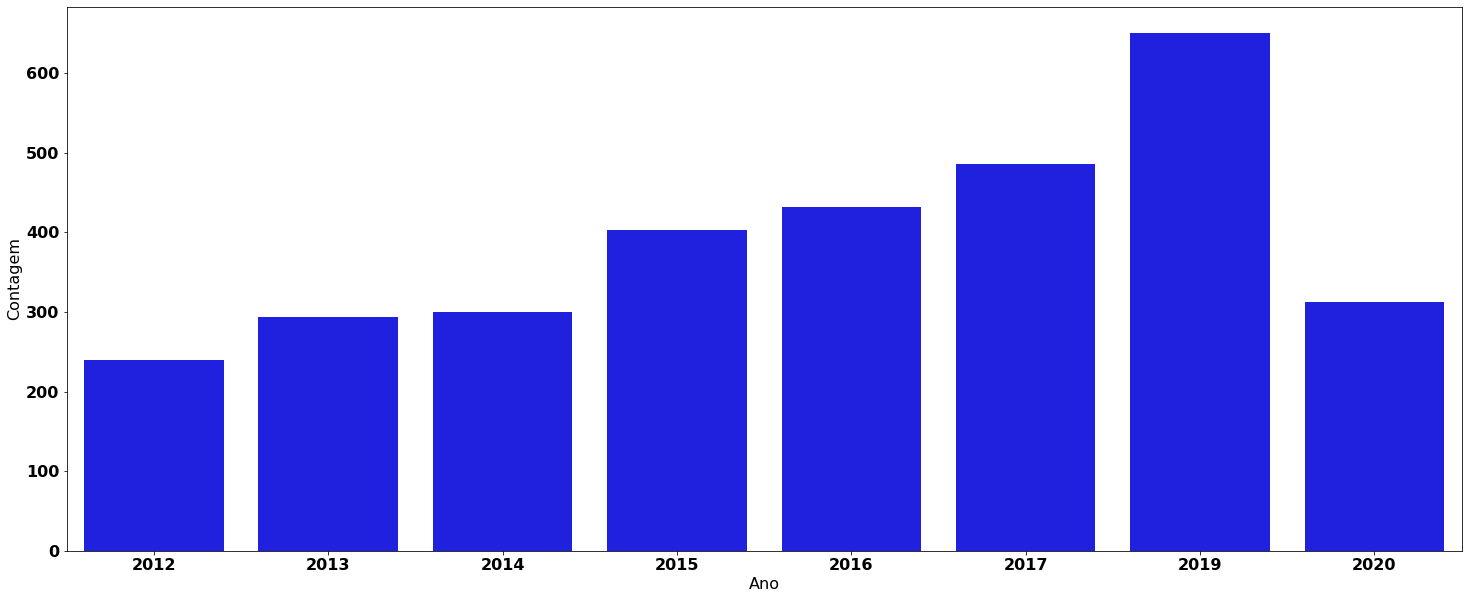

In [60]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_ano, x= "Ano", y = "Frequência", color = 'blue')
ax.set(ylabel = "Contagem")

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

# Save the figure
plt.savefig('bras-autor-tres-1.png', format='png')
plt.show()

## Pré-processamento

### Retirando letras Maiusculas

In [61]:
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

In [62]:
frase_processada = list()
for opiniao in df["Author Keywords"]:
    nova_frase = list()
    opiniao = str(opiniao).lower()
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    for palavra in palavras_texto:
        nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df["Tratamento1"] = frase_processada

### Retirando Pontuação

In [63]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

frase_processada = list()
for opiniao in df["Tratamento1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    for palavra in palavras_texto:
        if palavra not in pontuacao:
            nova_frase.append(palavra)
        else:
            if palavra == ';':
                nova_frase.append(palavra)
            
    frase_processada.append(' '.join(nova_frase))
    
df["Tratamento2"] = frase_processada

# Selecionar os Artigos que o Primeiro Autor é de Instituição Brasileira

# Data selection

In [64]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
list_country = list()
sign = -1
for afiliacoes in df["Authors with affiliations"]:
    if (sign == 0) :
        list_country.append(word)
    word = ""
    sign = 0
    palavras_texto = token_pontuacao.tokenize(str(afiliacoes))
    for palavra in palavras_texto:
        if( sign == 0):
            if palavra not in pontuacao:
                word = palavra
            else:
                if palavra == ";":
                    list_country.append(word)
                    sign = 1
                         
df["first author country"] = list_country

In [65]:
dados_filtered1 = df[df["first author country"] =='Brazil']
dados_filtered2 = df[df["first author country"] =='Brasil']
dados_filtered3 = df[df["first author country"] =='Brazilian']

dados_filtereds = [dados_filtered1, dados_filtered2, dados_filtered3]
dados_filtered1 = pd.concat(dados_filtereds)

In [66]:
#dados_filtered1

# Data Mining

### Gerando lista de Palavras Compostas

In [67]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

list_palavra = list()
frase_processada = list()
nova_palavra = ""
sigla = 0
for opiniao in dados_filtered1["Tratamento1"]:
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    if nova_palavra != "":
        frase_processada.append(nova_palavra)
        list_palavra.append(nova_palavra)
    nova_palavra = ""
    for palavra in palavras_texto:
        if(sigla == 0):
            if palavra not in pontuacao:
                if(palavra != "nan"):
                    if nova_palavra == "":
                        nova_palavra = palavra
                    else:
                        nova_palavra = nova_palavra + " " + palavra
            else:
                if palavra == ";":
                    list_palavra.append(nova_palavra)
                    frase_processada.append(nova_palavra)
                    nova_palavra = ""
        else:
            if palavra == ")":
                sigla = 0

In [68]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    lista_frequencia = list()
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("% s : % s"%(key, value))  
        
    return freq

In [69]:
dicionario_frequencia = CountFrequency(list_palavra) 

contextual design : 1
knowledge elicitation : 1
network of responsibilities : 1
brain : 1
etiology : 1
schizophrenia : 1
association rules : 47
label hierarchical clustering : 1
text mining : 149
learning algorithm : 1
optimum path forest classifier : 1
outlier detection : 8
supervised classification : 6
multi objective optimization : 4
particle swarm optimization : 10
rule induction : 4
data mining : 639
fuzzy ontology : 5
generalized semantic association rules : 1
redundant rules : 3
ensembles : 4
software tool : 1
time series forecasting : 5
incremental mining : 1
process mining : 53
workflow : 3
classification : 108
knowledge base : 4
knowledge representation : 8
optimize interests : 1
prototype : 2
statistics : 3
classification rules : 4
knowledge discovery in geographic databases : 1
collaboration : 9
collaboration and spatial data mining : 1
development of free software : 1
framework : 10
interoperability : 5
spatial data mining : 19
feature and action selection : 1
intelligent 

In [70]:
df_frequencia_tratamento1 = pd.DataFrame({"Palavra": list(dicionario_frequencia.keys()),
                             "Frequência": list(dicionario_frequencia.values())})
df_frequencia_tratamento1 = df_frequencia_tratamento1.nlargest(columns = "Frequência", n = 9)
df_frequencia_tratamento1 = df_frequencia_tratamento1.iloc[1:]
df_frequencia_tratamento1

,Palavra,Frequência
102,machine learning,198
8,text mining,149
26,classification,108
357,sentiment analysis,103
152,clustering,95
650,big data,60
155,educational data mining,56
568,decision tree,55


In [71]:
df_frequencia_tratamento1.shape

(8, 2)

### Pattern evaluation

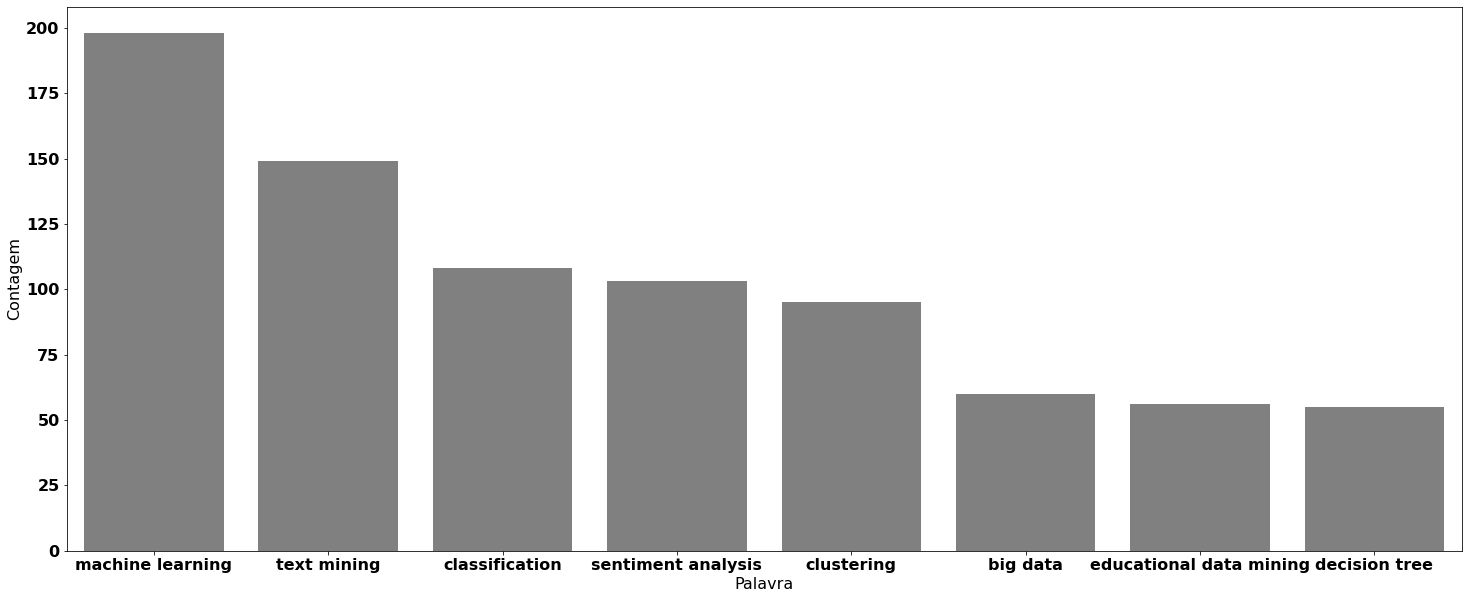

In [72]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_frequencia_tratamento1, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

# Save the figure
plt.savefig('bras-autor-tres-1.png', format='png')
plt.show()

# Selecionar os Artigos que Pelo Menos um Autor é de Instituição Brasileira

In [73]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
list_geral = list()
sign = -1
result = ""
for afiliacoes in df["Authors with affiliations"]:
    result = ""
    sign = 0
    palavras_texto = token_pontuacao.tokenize(str(afiliacoes))
    for palavra in palavras_texto:
        if(sign == 0):
            if palavra == 'Brazil' or palavra == 'Brasil' or palavra == 'Brazilian':
                result = 'sim'
                sign = 1
            else:
                result = 'nao'
    list_geral.append(result)
                          
df["there are Brazilian authors?"] = list_geral

In [74]:
dados_filtered2 = df[df["there are Brazilian authors?"] =='sim']

In [75]:
df.to_csv (r'ieee-busca2.csv', index = False, header=True)

### Gerando lista de palavras

In [76]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

list_palavra = list()
frase_processada = list()
nova_palavra = ""
sigla = 0
for opiniao in dados_filtered2["Tratamento1"]:
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    if nova_palavra != "":
        frase_processada.append(nova_palavra)
        list_palavra.append(nova_palavra)
    nova_palavra = ""
    for palavra in palavras_texto:
        if(sigla == 0):
            if palavra not in pontuacao:
                if(palavra != "nan"):
                    if nova_palavra == "":
                        nova_palavra = palavra
                    else:
                        nova_palavra = nova_palavra + " " + palavra
            else:
                if palavra == ";":
                    list_palavra.append(nova_palavra)
                    frase_processada.append(nova_palavra)
                    nova_palavra = ""
        else:
            if palavra == ")":
                sigla = 0

In [77]:
dicionario_frequencia = CountFrequency(list_palavra)

contextual design : 1
knowledge elicitation : 1
network of responsibilities : 1
brain : 1
etiology : 1
schizophrenia : 1
association rules : 50
label hierarchical clustering : 1
text mining : 156
learning algorithm : 1
optimum path forest classifier : 1
outlier detection : 12
supervised classification : 6
cancer : 5
specialized software for data mining : 2
multi objective optimization : 5
particle swarm optimization : 13
rule induction : 4
data mining : 705
fuzzy ontology : 5
generalized semantic association rules : 1
redundant rules : 3
ensembles : 5
software tool : 1
time series forecasting : 5
incremental mining : 1
process mining : 63
workflow : 3
classification : 122
knowledge base : 4
knowledge representation : 9
optimize interests : 1
prototype : 2
statistics : 5
classification rules : 4
knowledge discovery in geographic databases : 1
collaboration : 12
collaboration and spatial data mining : 1
development of free software : 1
framework : 11
interoperability : 5
spatial data min

In [78]:
df_frequencia_tratamento2 = pd.DataFrame({"Palavra": list(dicionario_frequencia.keys()),
                             "Frequência": list(dicionario_frequencia.values())})
df_frequencia_tratamento2 = df_frequencia_tratamento2.nlargest(columns = "Frequência", n = 9)
df_frequencia_tratamento2 = df_frequencia_tratamento2.iloc[1:]
df_frequencia_tratamento2

,Palavra,Frequência
104,machine learning,222
8,text mining,156
28,classification,122
402,sentiment analysis,112
167,clustering,107
711,big data,76
26,process mining,63
170,educational data mining,61


### Pattern evaluation

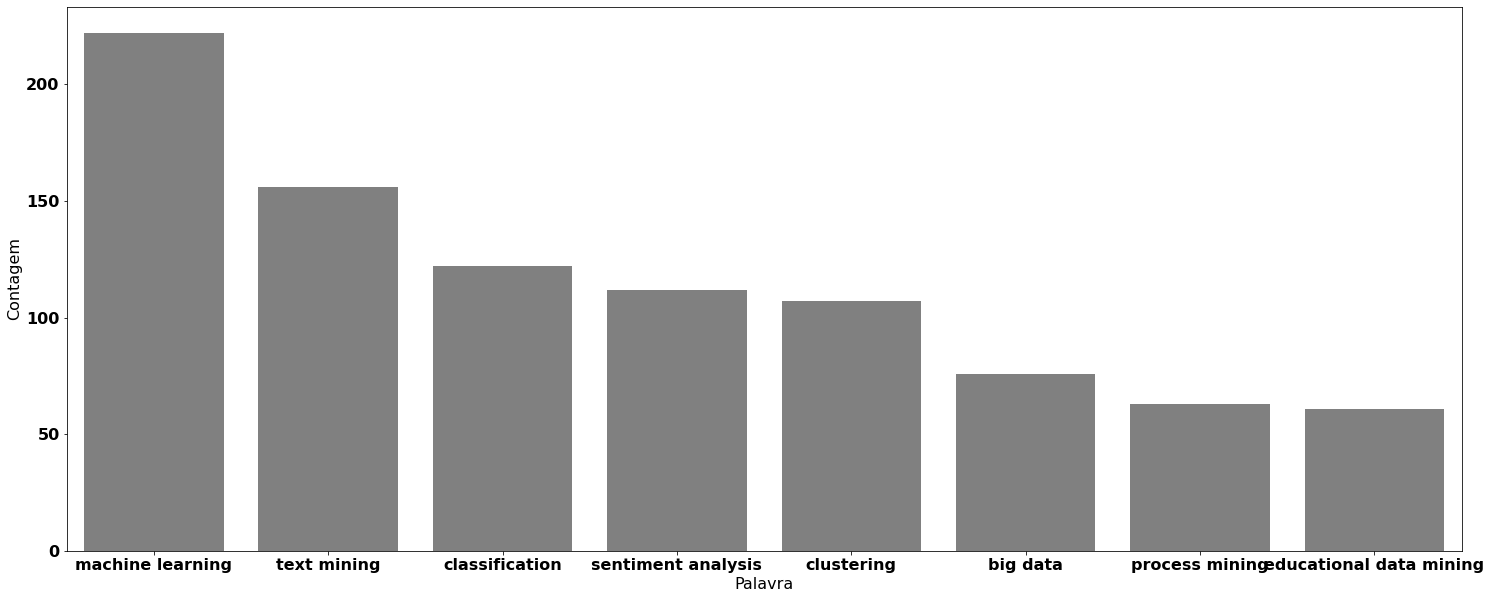

In [79]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_frequencia_tratamento2, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

# Save the figure
plt.savefig('bras-autor-tres-2.png', format='png')
plt.show()

plt.show()

# Selecionando todos os artigos do dataset

In [80]:
frase_processada = list()
for opiniao in df["Author Keywords"]:
    nova_frase = list()
    opiniao = str(opiniao).lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df["Tratamento1"] = frase_processada
df

,Authors,Title,Year,DOI,Link,Authors with affiliations,Abstract,Author Keywords,Publisher,Tratamento1,Tratamento2,first author country,there are Brazilian authors?
0,"Bartolini C., Breitman K., Barbosa S.D.J., Sal...",Understanding IT organizations,2010,10.1007/978-3-642-16558-0_41,https://www.scopus.com/inward/record.uri?eid=2...,"Bartolini, C., Hewlett-Packard, Gávea - Rio de...",Understanding IT organization is essential for...,contextual design; knowledge elicitation; netw...,NaN,contextual design ; knowledge elicitation ; ne...,contextual design ; knowledge elicitation ; ne...,Brazil,sim
1,"Dias A.M., Rodrigues E.A.L.","Schizophrenia, genetics, epigenesis, environme...",2010,NaN,https://www.scopus.com/inward/record.uri?eid=2...,"Dias, A.M., Departamento de Psiquiatria, Facul...",Context: Schizophrenia is a highly complex syn...,Brain; Etiology; Schizophrenia,NaN,brain ; etiology ; schizophrenia,brain ; etiology ; schizophrenia,Brazil,sim
2,"Coimbra R.S., Vanderwall D.E., Oliveira G.C.",Disclosing ambiguous gene aliases by automatic...,2010,10.1186/1471-2164-11-S5-S3,https://www.scopus.com/inward/record.uri?eid=2...,"Coimbra, R.S., Center for Excellence in Bioinf...",Background: Retrieving pertinent information f...,NaN,NaN,nan,nan,Brazil,sim
3,"Machado K.S., Winck A.T., Ruiz D.D.A., Norbert...",Mining flexible-receptor docking experiments t...,2010,10.1186/1471-2164-11-S5-S6,https://www.scopus.com/inward/record.uri?eid=2...,"Machado, K.S., LABIO - Laboratório de Bioinfor...",Background: Molecular docking simulation is th...,NaN,NaN,nan,nan,Brazil,sim
4,"Dos Santos F.F., De Carvalho V.O., Oliveira Re...",Selecting candidate labels for hierarchical do...,2010,10.1007/978-3-642-16773-7_14,https://www.scopus.com/inward/record.uri?eid=2...,"Dos Santos, F.F., Instituto de Ciências Matemá...",One way to organize knowledge and make its sea...,association rules; label hierarchical clusteri...,NaN,association rules ; label hierarchical cluster...,association rules ; label hierarchical cluster...,Brazil,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,J. M. do Valle; G. Souza; S. Fidelis; A. Araúj...,Big Data Platform for Analysing Crime Evidences,2020,10.1109/BigDataService49289.2020.00025,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Federal University of Rio Grande do Norte; Fed...,"During a criminal investigation, the evidence ...",distributed systems;lambda architecture;crime ...,IEEE,distributed systems ; lambda architecture ; cr...,distributed systems ; lambda architecture ; cr...,Norte,nao
1213,M. N. Shafique; M. M. Khurshid; H. Rahman; A. ...,The Role of Wearable Technologies in Supply Ch...,2019,10.1109/ACCESS.2019.2909400,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,"Dongbei University of Finance and Economics, D...",The technological transformation has led to th...,Internet of things;emotional intelligence;gree...,IEEE,internet of things ; emotional intelligence ; ...,internet of things ; emotional intelligence ; ...,China,sim
1214,D. Haidar; M. M. Gaber,Adaptive One-Class Ensemble-based Anomaly Dete...,2018,10.1109/IJCNN.2018.8489107,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,"School of Computing and Digital Technology, Un...",The malicious insider threat is getting increa...,NaN,IEEE,nan,nan,Kingdom,nao
1215,F. Shull,Getting an Intuition for Big Data,2013,10.1109/MS.2013.76,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Fraunhofer Center for Experimental Software En...,IEEE Software Editor-in-Chief Forrest Shull di...,big data;smart data;reliability;software;inter...,IEEE,big data ; smart data ; reliability ; software...,big data ; smart data ; reliability ; software...,Engineering,nao


In [81]:
df.to_csv('ieee-busca2-todos.csv')

In [82]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

list_palavra = list()
frase_processada = list()
nova_palavra = ""
sigla = 0
for opiniao in df["Tratamento1"]:
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    if nova_palavra != "":
        frase_processada.append(nova_palavra)
        list_palavra.append(nova_palavra)
    nova_palavra = ""
    for palavra in palavras_texto:
        if(sigla == 0):
            if palavra not in pontuacao:
                if(palavra != "nan"):
                    if nova_palavra == "":
                        nova_palavra = palavra
                    else:
                        nova_palavra = nova_palavra + " " + palavra
            else:
                if palavra == ";":
                    list_palavra.append(nova_palavra)
                    frase_processada.append(nova_palavra)
                    nova_palavra = ""
        else:
            if palavra == ")":
                sigla = 0

In [83]:
dicionario_frequencia = CountFrequency(list_palavra)

contextual design : 1
knowledge elicitation : 1
network of responsibilities : 1
brain : 1
etiology : 1
schizophrenia : 1
association rules : 51
label hierarchical clustering : 1
text mining : 160
learning algorithm : 1
optimum path forest classifier : 1
outlier detection : 13
supervised classification : 6
cancer : 5
specialized software for data mining : 2
multi objective optimization : 5
particle swarm optimization : 14
rule induction : 4
data mining : 733
fuzzy ontology : 5
generalized semantic association rules : 1
redundant rules : 3
ensembles : 5
software tool : 2
time series forecasting : 5
incremental mining : 1
process mining : 63
workflow : 3
classification : 130
knowledge base : 4
knowledge representation : 9
optimize interests : 1
prototype : 2
statistics : 5
classification rules : 4
knowledge discovery in geographic databases : 1
collaboration : 12
collaboration and spatial data mining : 1
development of free software : 1
framework : 11
interoperability : 5
spatial data min

In [84]:
df_frequencia_tratamento3 = pd.DataFrame({"Palavra": list(dicionario_frequencia.keys()),
                             "Frequência": list(dicionario_frequencia.values())})
df_frequencia_tratamento3 = df_frequencia_tratamento3.nlargest(columns = "Frequência", n = 9)
df_frequencia_tratamento3 = df_frequencia_tratamento3.iloc[1:]
df_frequencia_tratamento3


,Palavra,Frequência
104,machine learning,234
8,text mining,160
28,classification,130
402,sentiment analysis,114
167,clustering,112
711,big data,81
170,educational data mining,69
26,process mining,63


### Pattern evaluation

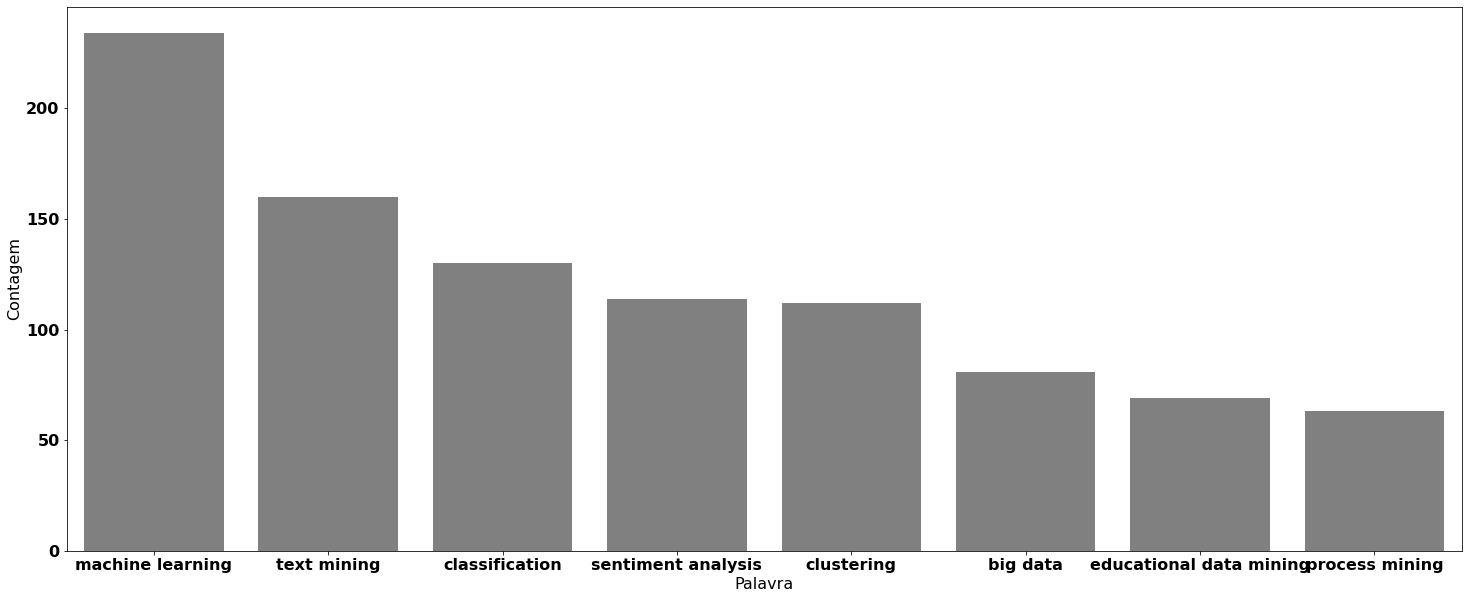

In [85]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_frequencia_tratamento3, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

# Save the figure
plt.savefig('bras-autor-dois-3.png', format='png')
plt.show()


In [86]:
values = dicionario_frequencia.values()
values_list = list(values)
elm_count = values_list.count(1)
sum_all = sum(values_list)
print(elm_count, sum_all)

6490 15826


# Sistema de recomendação de artigos

# Data Mining

In [87]:
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [455]:
#Number of Permutations
permutations = 128

#Number of Recommendations to return
num_recommendations = 10

In [456]:
def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in data['text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    return forest

In [457]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    result = list()
    i = 0
    while i < len(idx_array):
        result.append((text, idx_array[i], database.iloc[idx_array[i]]['Title']))
        i += 1
    #result = database.iloc[2948]['Title']
    
    return result

In [458]:
df['text'] = df['Title']
forest = get_forest(df, permutations)

dados_filtered1['text'] = dados_filtered1['Title']
forest_author_first = get_forest(dados_filtered1, permutations)

dados_filtered2['text'] = dados_filtered2['Title']
forest_brazil_author = get_forest(dados_filtered2, permutations)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [459]:
import numpy as np
top_10_artigos_primeiro_autor_brasileiro = list()
top_10_artigos_com_um_autor_brasileiro = list()
top_10_artigos_geral = list()

for word in df_frequencia_tratamento1["Palavra"]:
    num_recommendations = 2
    result = predict(str(word), dados_filtered1, permutations, num_recommendations, forest_author_first)
    top_10_artigos_primeiro_autor_brasileiro.append(result)
    
for word in df_frequencia_tratamento2["Palavra"]:
    num_recommendations = 2
    result = predict(str(word), dados_filtered2, permutations, num_recommendations, forest_brazil_author)
    top_10_artigos_com_um_autor_brasileiro.append(result)
    
for word in df_frequencia_tratamento3["Palavra"]:
    num_recommendations = 2
    result = predict(str(word), df, permutations, num_recommendations, forest)
    top_10_artigos_geral.append(result)
    


### Primeiro autor brasileiro

In [461]:
authors_list_first = list()
pd.options.display.max_colwidth = 500

i = 1
df_rc_first_author = pd.DataFrame(top_10_artigos_primeiro_autor_brasileiro[0],columns=['Palavra', 'indice', 'Artigo Recomendado'])
while i < len(top_10_artigos_primeiro_autor_brasileiro):
    df_rc_first = pd.DataFrame(top_10_artigos_primeiro_autor_brasileiro[i],columns=['Palavra', 'indice', 'Artigo Recomendado'])
    df_rc_first_author = pd.concat([df_rc_first_author, df_rc_first])
    i += 1
    
for title in df_rc_first_author['Artigo Recomendado']:
    #authors = df.loc[df['Title']==title, 'Authors with affiliations']
    authors = df.loc[df['Title']==title, 'Authors with affiliations']
    authors_list_first.append(authors.to_string(index=False))
        
df_rc_first_author['Authors'] = authors_list_first

df_rc_first_author
df_rc_first_author.to_csv (r'df_rc_first_author_dst2.csv', index = False, header=True)


### Pelo menos um autor brasileiro

In [462]:
authors_list_one = list()
i = 1
df_rc_brazil_author = pd.DataFrame(top_10_artigos_com_um_autor_brasileiro[0],columns=['Palavra', 'indice', 'Artigo Recomendado'])
while i < len(top_10_artigos_com_um_autor_brasileiro):
    df_rc_brazil = pd.DataFrame(top_10_artigos_com_um_autor_brasileiro[i],columns=['Palavra', 'indice', 'Artigo Recomendado'])
    df_rc_brazil_author = pd.concat([df_rc_brazil_author, df_rc_brazil])
    i += 1
    
for title in df_rc_brazil_author['Artigo Recomendado']:
    authors = df.loc[df['Title']==title, 'Authors with affiliations']
    authors_list_one.append(authors.to_string(index=False))
        
df_rc_brazil_author['Authors'] = authors_list_one
    
df_rc_brazil_author
df_rc_brazil_author.to_csv (r'df_rc_brazil_author_dst2.csv', index = False, header=True)

### Artigo geral

In [463]:
authors_list_all = list()

i = 1
df_rc_geral = pd.DataFrame(top_10_artigos_geral[0],columns=['Palavra', 'indice', 'Artigo Recomendado'])
while i < len(top_10_artigos_geral):
    df_rc = pd.DataFrame(top_10_artigos_geral[i],columns=['Palavra', 'indice', 'Artigo Recomendado'])
    df_rc_geral = pd.concat([df_rc_geral, df_rc])

    i += 1
    
for title in df_rc_geral['Artigo Recomendado']:
    authors = df.loc[df['Title']==title, 'Authors with affiliations']
    authors_list_all.append(authors.to_string(index=False))
        
df_rc_geral['Authors'] = authors_list_all
    
df_rc_geral
df_rc_geral.to_csv (r'df_rc_geral_dst2.csv', index = False, header=True)